In [203]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go   


In [204]:
df=pd.read_csv('Churn_Modelling.csv')

In [205]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [206]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [207]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df['Geography'].value_counts()  

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

In [208]:
df.dropna(inplace=True)

In [209]:
df.shape

(9998, 11)

In [210]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Text(0.5, 1.0, 'Age vs Balance')

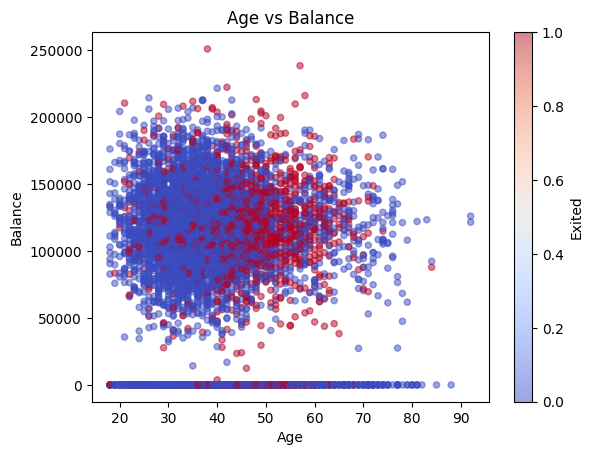

In [211]:
df.plot.scatter(x='Age', y='Balance', c='Exited', cmap='coolwarm', alpha=0.5)
plt.title('Age vs Balance')

Text(0.5, 0, 'Age')

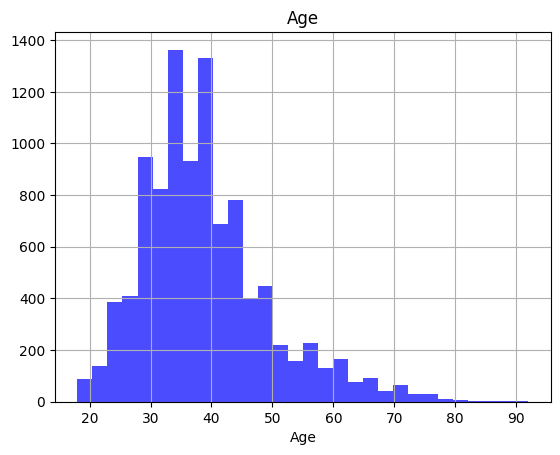

In [212]:
df.hist(column='Age', bins=30, color='blue', alpha=0.7)
plt.xlabel('Age')

Text(0.5, 0, 'Age')

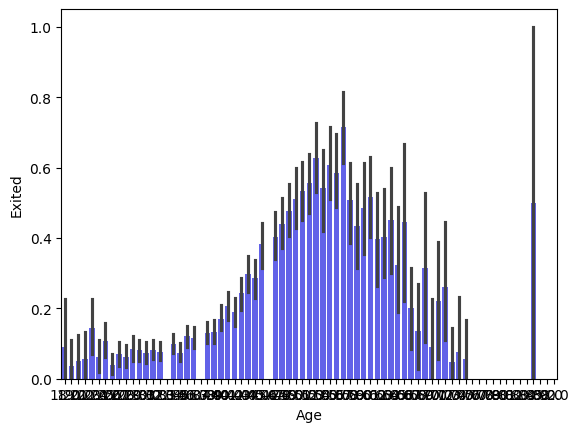

In [213]:
sns.barplot(x=df['Age'], y=df['Exited'], color='blue', alpha=0.7)
plt.xlabel('Age')

### let's perform EDA on the given dataset

Exited
0    0.796159
1    0.203841
Name: proportion, dtype: float64


<Axes: title={'center': 'Churn Distribution'}, ylabel='count'>

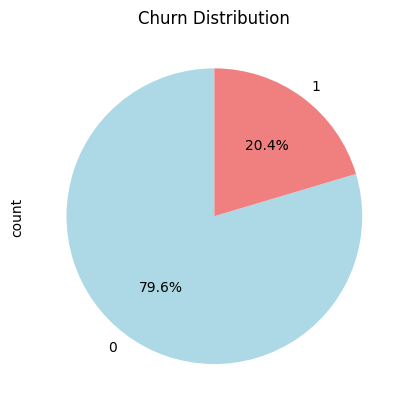

In [214]:
# lets check the distribution of the target variable
## and we'll see if it's imbalanced or not
## ans it's  imbananced
plt.title('Churn Distribution')
print(df['Exited'].value_counts(normalize=True))
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

Text(0.5, 1.0, 'Churn Distribution (Normalized)')

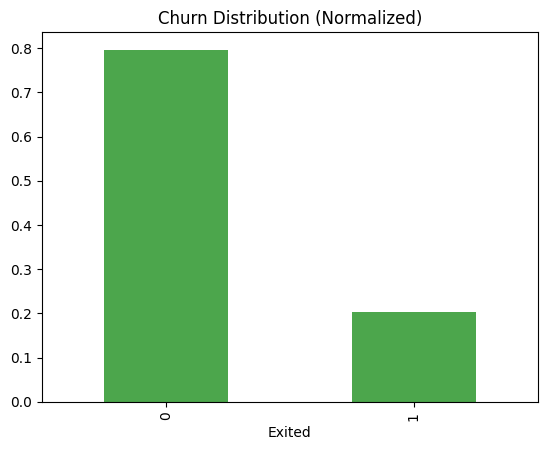

In [215]:
df['Exited'].value_counts(normalize=True).plot(kind='bar', color='green', alpha=0.7)
plt.title('Churn Distribution (Normalized)')

In [216]:
df_gen=df['Gender'].value_counts()
df_gen

Gender
Male      5455
Female    4543
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\2125483969.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')


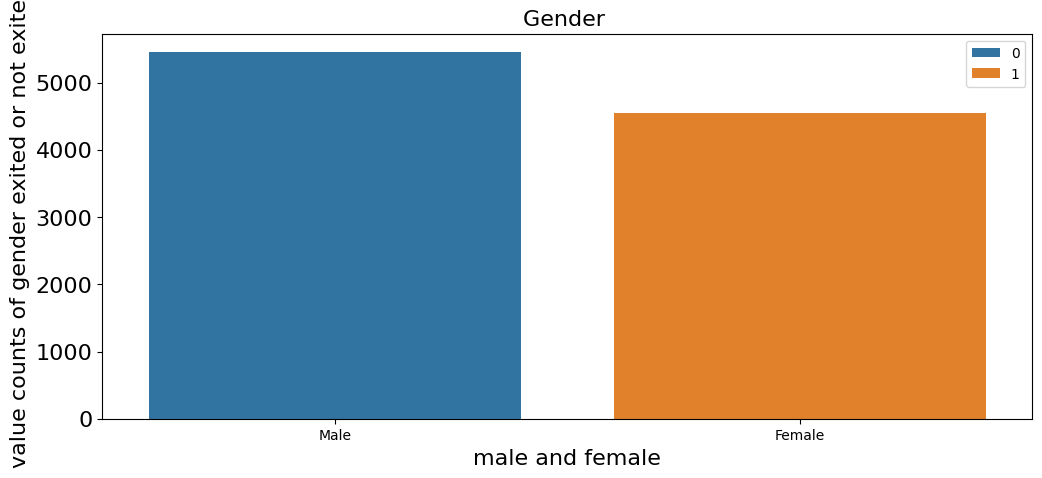

In [217]:
## lets perform univarient analysis 
## and we'll see the distribution of the features 
## and we'll see if it's imbalanced or not
## lets see univerient on gender column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_gen,x=df_gen.index,hue=[0,1])
res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')
plt.xlabel('male and female',fontsize=16,color='black')    
plt.ylabel("value counts of gender exited or not exited",fontsize=16,color='black')
plt.title("Gender ",fontsize=16,color='black')
plt.show()
## we have seen that is not imbalanced 

In [218]:
df_geo=df['Geography'].value_counts()
df_geo

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\2161058696.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')


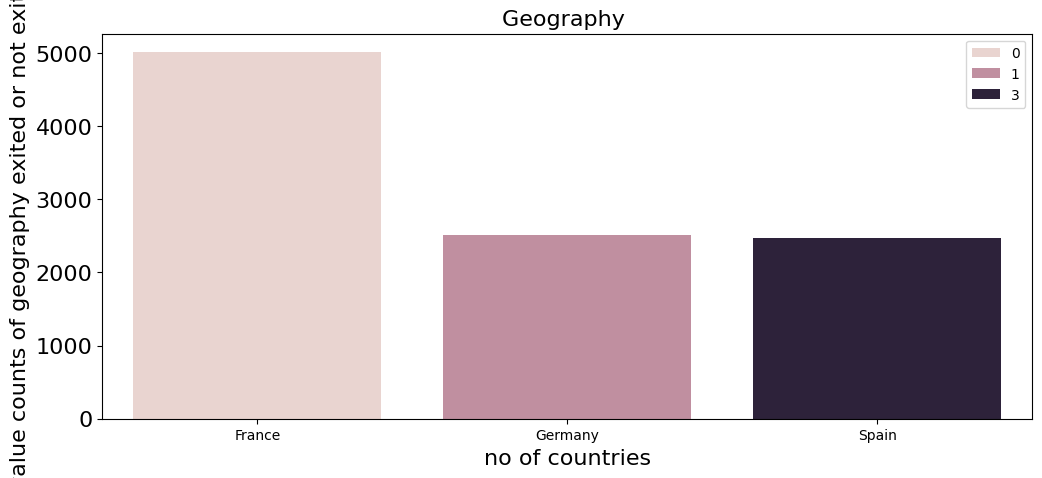

In [219]:
## lets see univerient on geography column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_geo,x=df_geo.index,hue=[0,1,3])
res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')
plt.xlabel('no of countries',fontsize=16,color='black')
plt.ylabel("value counts of geography exited or not exited",fontsize=16,color='black')
plt.title("Geography ",fontsize=16,color='black')
plt.show()


In [220]:
## value counts of number of products exited or not exited
df_prod=df['NumOfProducts'].value_counts()
df_prod

NumOfProducts
1    5083
2    4589
3     266
4      60
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\2680064294.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')


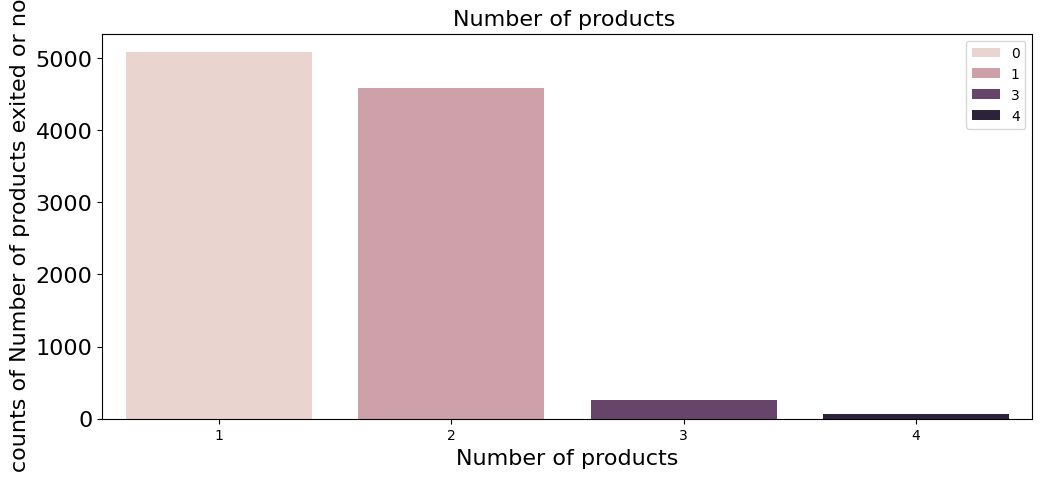

In [221]:
# lets see univerient on Number  of products column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_prod,x=df_prod.index,hue=[0,1,3,4])
res.set_yticklabels(res.get_yticklabels(),  fontsize=16, color='black')
plt.xlabel('Number of products',fontsize=16,color='black')
plt.ylabel("value counts of Number of products exited or not exited",fontsize=16,color='black')
plt.title("Number of products ",fontsize=16,color='black')
plt.show()

In [222]:
# lets see univerient on HasCrCard column
df_HasCrCard=df['HasCrCard'].value_counts()
df_HasCrCard

HasCrCard
1.0    7054
0.0    2944
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\1257732792.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')


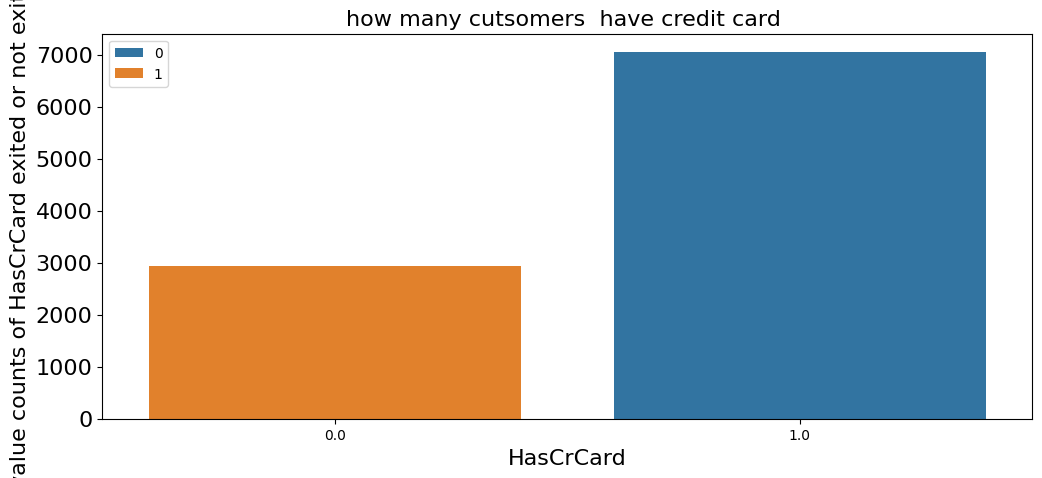

In [223]:
# lets perform univarient analysis on HasCrCard column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_HasCrCard,x=df_HasCrCard.index,hue=[0,1])
res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')
plt.xlabel('HasCrCard',fontsize=16,color='black')
plt.ylabel("value counts of HasCrCard exited or not exited",fontsize=16,color='black')
plt.title("how many cutsomers  have credit card ",fontsize=16,color='black')
plt.show()


In [224]:
# lets see univerient on IsActiveMember column
df_IsActiveMember=df['IsActiveMember'].value_counts()
df_IsActiveMember

IsActiveMember
1.0    5147
0.0    4851
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\2735042110.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')


Text(0.5, 1.0, 'how many cutsomers  are active members ')

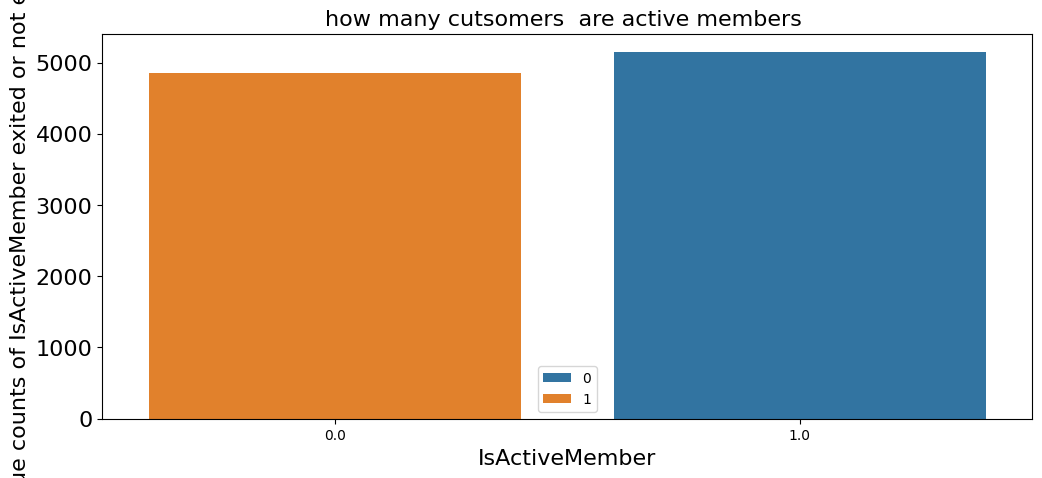

In [225]:
## lets perform univarient analysis on IsActiveMember column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_IsActiveMember,x=df_IsActiveMember.index,hue=[0,1])
res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')
plt.xlabel('IsActiveMember',fontsize=16,color='black')
plt.ylabel("value counts of IsActiveMember exited or not exited",fontsize=16,color='black')
plt.title("how many cutsomers  are active members ",fontsize=16,color='black')


In [226]:
# lets see the values counts of Exited column
df_Exited=df['Exited'].value_counts()
df_Exited

Exited
0    7960
1    2038
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\2419156918.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')


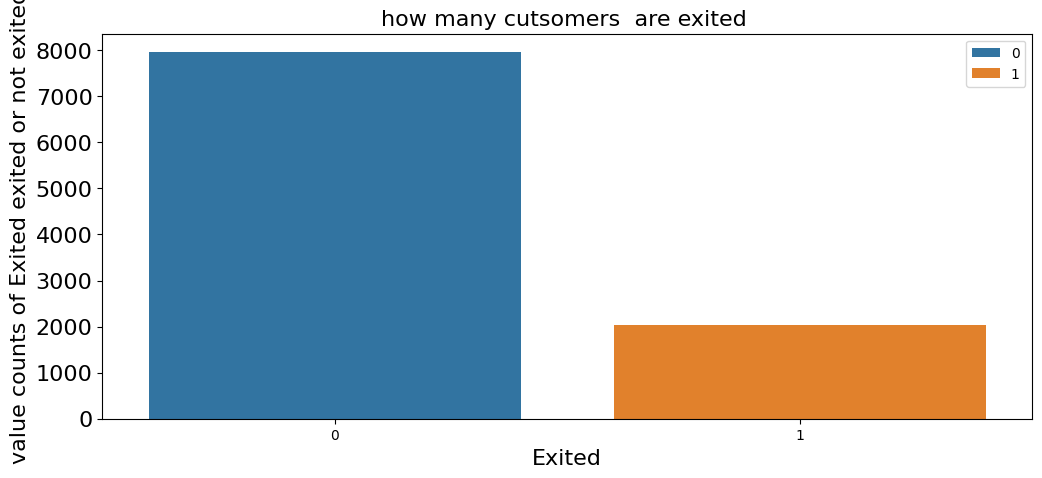

In [227]:
## lets perform univarient analysis on Exited column
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_Exited,x=df_Exited.index,hue=[0,1])
res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')
plt.xlabel('Exited',fontsize=16,color='black')
plt.ylabel("value counts of Exited exited or not exited",fontsize=16,color='black')
plt.title("how many cutsomers  are exited ",fontsize=16,color='black')
plt.show()

### apply one hot encoding technique on gender geography column


### lets handle the imbalanaced target column and balance it 


In [228]:
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]
# Upsample the minority class
from sklearn.utils import resample

df_upsampled = resample(minority_class, 
                                     replace=True,n_samples=len(majority_class), random_state=42)
df_upsampled = pd.concat([majority_class, df_upsampled])




In [229]:
df_exit=df_upsampled['Exited'].value_counts()
df_exit

Exited
0    7960
1    7960
Name: count, dtype: int64

C:\Users\wwwan\AppData\Local\Temp\ipykernel_4604\1392812466.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')


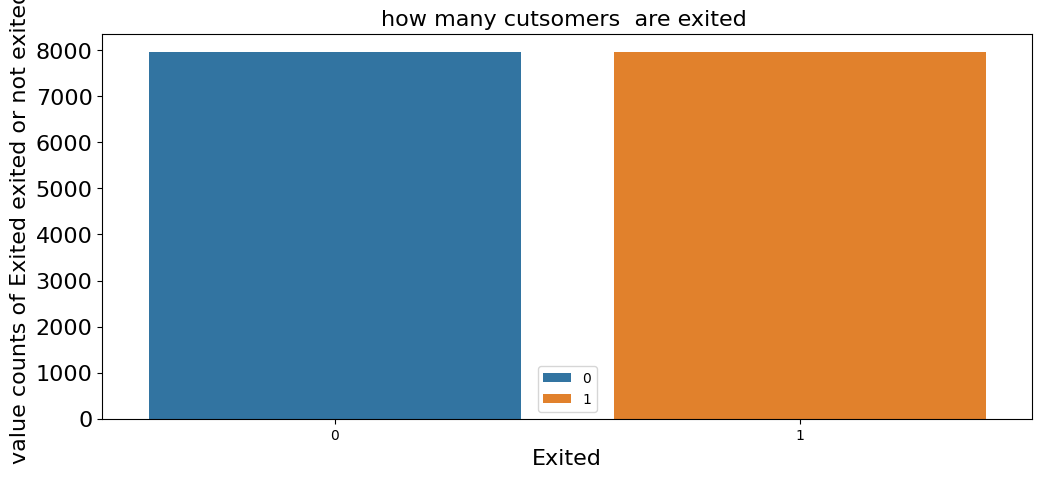

In [230]:
plt.figure(figsize=(12, 5))
res=sns.barplot(y=df_exit,x=df_exit.index,hue=[0,1])
res.set_yticklabels(res.get_yticklabels(),fontsize=16,color='black')
plt.xlabel('Exited',fontsize=16,color='black')
plt.ylabel("value counts of Exited exited or not exited",fontsize=16,color='black')
plt.title("how many cutsomers  are exited ",fontsize=16,color='black')
plt.show()
# lets see the values counts of Exited column

### split the data into input and out put columns


In [231]:
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [232]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,1,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,1,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,1,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,2,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,2,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0,1,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [233]:
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), to_categorical(df['Exited']), test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7998, 10), (2000, 10), (7998, 2), (2000, 2))

In [234]:
### encoding the two categorical columns
## scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((7998, 10), (2000, 10), (7998, 2), (2000, 2))

## building ANN


In [235]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping
## initialing ann
model = Sequential()
## adding the input layer and the first hidden layer
model.add(Dense(10, activation='relu',
                kernel_initializer='normal',
                input_shape=(10,)))
## adding batch normalization
model.add(BatchNormalization())
## adding dropout
model.add(Dropout(0.1))
## adding the second hidden layer
model.add(Dense(7,activation='relu',
                kernel_initializer='normal',
                input_shape=(10,)))  
## adding batch normalization
model.add(BatchNormalization())
## adding dropout
model.add(Dropout(0.1))
## adding the third hidden layer
model.add(Dense(2,activation='sigmoid',kernel_initializer='normal',
                input_shape=(10,)))
## adding batch normalization
model.add(BatchNormalization())
## adding dropout
model.add(Dropout(0.1))

## comliping the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fitting the model to the training data
model_history =model.fit(x_train,y_train,epochs=100,validation_split=0.2,validation_data=(x_test,y_test))


c:\Users\wwwan\anacondapython\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5054 - loss: 4.6758 - val_accuracy: 0.7860 - val_loss: 0.6956
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6466 - loss: 3.1967 - val_accuracy: 0.7230 - val_loss: 1.2077
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6712 - loss: 2.6162 - val_accuracy: 0.7120 - val_loss: 1.6069
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6853 - loss: 2.3044 - val_accuracy: 0.7360 - val_loss: 1.3929
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7142 - loss: 2.2335 - val_accuracy: 0.7710 - val_loss: 1.3236
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7244 - loss: 2.2088 - val_accuracy: 0.7410 - val_loss: 0.8983
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7127 - loss: 1.7779 - val_accuracy: 0.6555 - val_loss: 1.0282
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6589 - loss: 1.7943 - val_accu

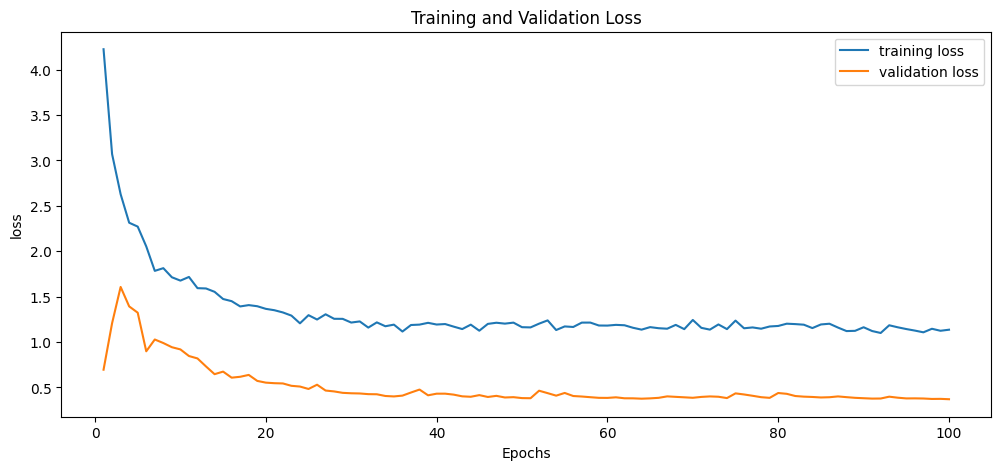

In [236]:
# visualizing the training and validation loss
plt.figure(figsize=(12, 5))
train_loss = model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs,train_loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


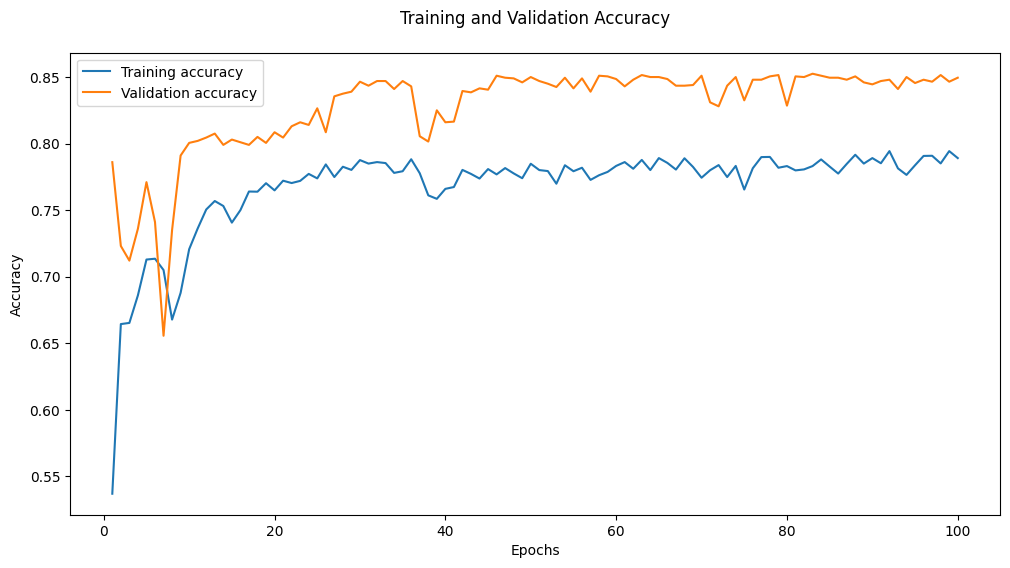

In [237]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_loss, label = 'Training accuracy')
sns.lineplot(x=epoch, y=val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [240]:
accuracy=model.evaluate(x_test,y_test)[1]
print("accuracy of the model is ",accuracy*100,"%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8563 - loss: 0.3645
accuracy of the model is  84.95000004768372 %


In [241]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 2)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 763 (2.98 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 38 (152.00 B)

 Optimizer params: 484 (1.89 KB)

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import pydot
import keras

from keras.utils import plot_model
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)#, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [262]:
#! pip install pydot
#! pip install graphviz
#! apt-get install graphviz
! pip install pydot graphviz

import pydot
